In [4]:
import cv2
import numpy as np
import myimage_pre as mp

In [5]:
image_path = 't1.BMP'

In [ ]:
def myfun(image_path):
    # 1. 读取图片
    image = cv2.imread(image_path)


    # 创建一个用于绘制结果的副本
    output_image = image.copy()

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # 3. 二值化处理
    threshold_val = 120
    _, thresh = cv2.threshold(blurred, threshold_val, 255, cv2.THRESH_BINARY)

    # 4. 形态学操作（闭运算）以填充轮廓中的孔洞
    kernel = np.ones((5, 5), np.uint8)
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    mp.show_pic_simple([blurred,thresh,closed],['gausin_blurred','binary','closed'])

    # 5. 查找轮廓
    # cv2.RETR_EXTERNAL 只检测外轮廓
    # cv2.CHAIN_APPROX_SIMPLE 压缩轮廓点
    contours, _ = cv2.findContours(closed_inverted, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    min_area = 2
    # 6. 过滤并绘制轮廓
    for contour in contours:
        # 过滤掉面积过小的轮廓
        if cv2.contourArea(contour) > min_area:
            cv2.drawContours(output_image, [contour], -1, (0, 255, 0), 2)



In [6]:
# 1. 读取图片
image = cv2.imread(image_path)


# 创建一个用于绘制结果的副本
output_image = image.copy()

In [18]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

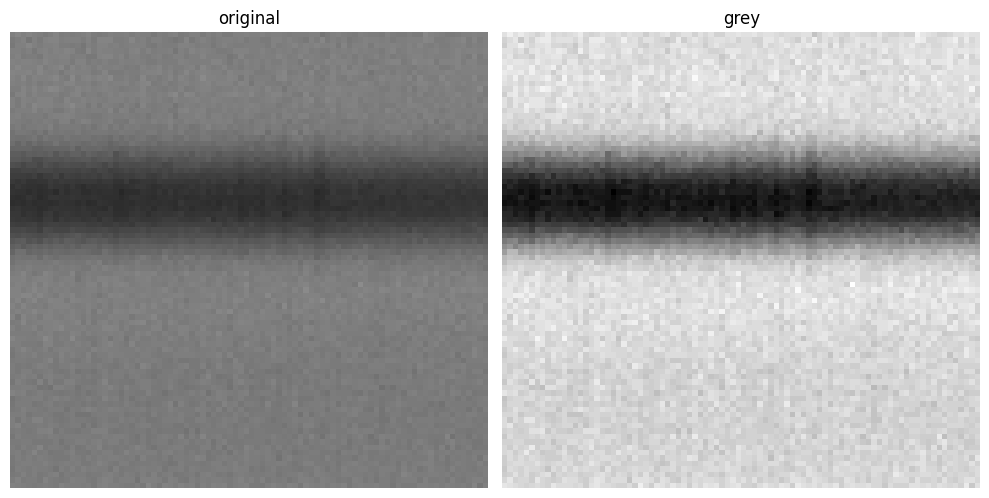

In [19]:
mp.show_pic_simple([image, gray],['original','grey'])

In [20]:

image.shape
gray.shape

(84, 88)

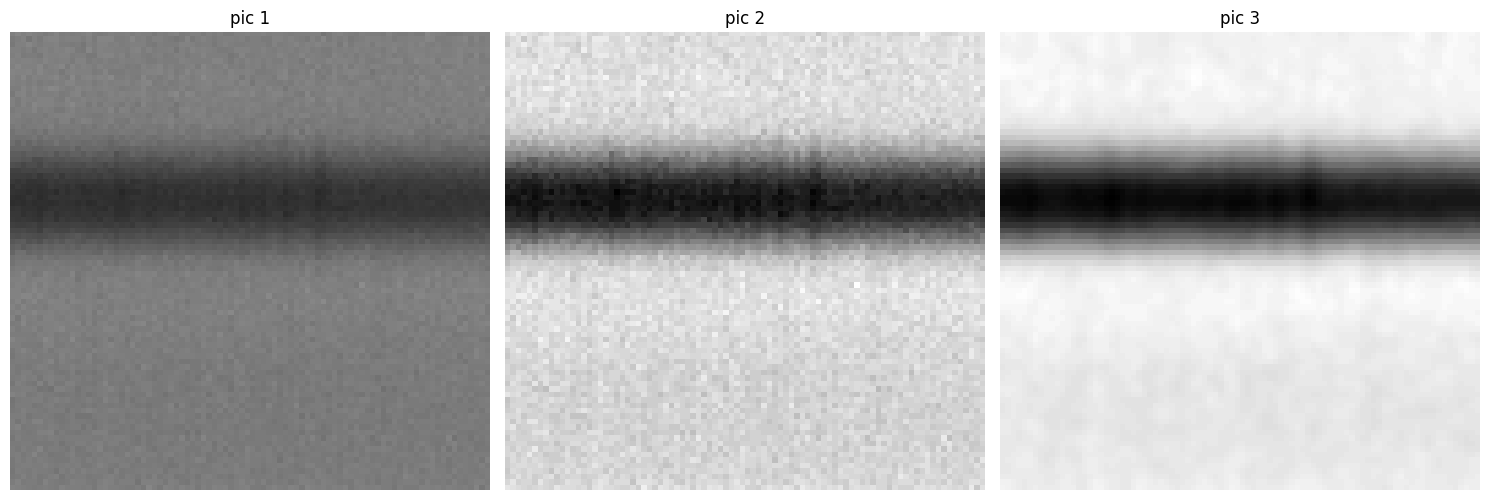

In [21]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
mp.show_pic_simple([image,gray,blurred])

In [45]:
# 3. 二值化处理
threshold_val = 120
_, thresh = cv2.threshold(blurred, threshold_val, 255, cv2.THRESH_BINARY)
#_, thresh = cv2.threshold(blurred, threshold_val, 255, cv2.THRESH_BINARY_INV)


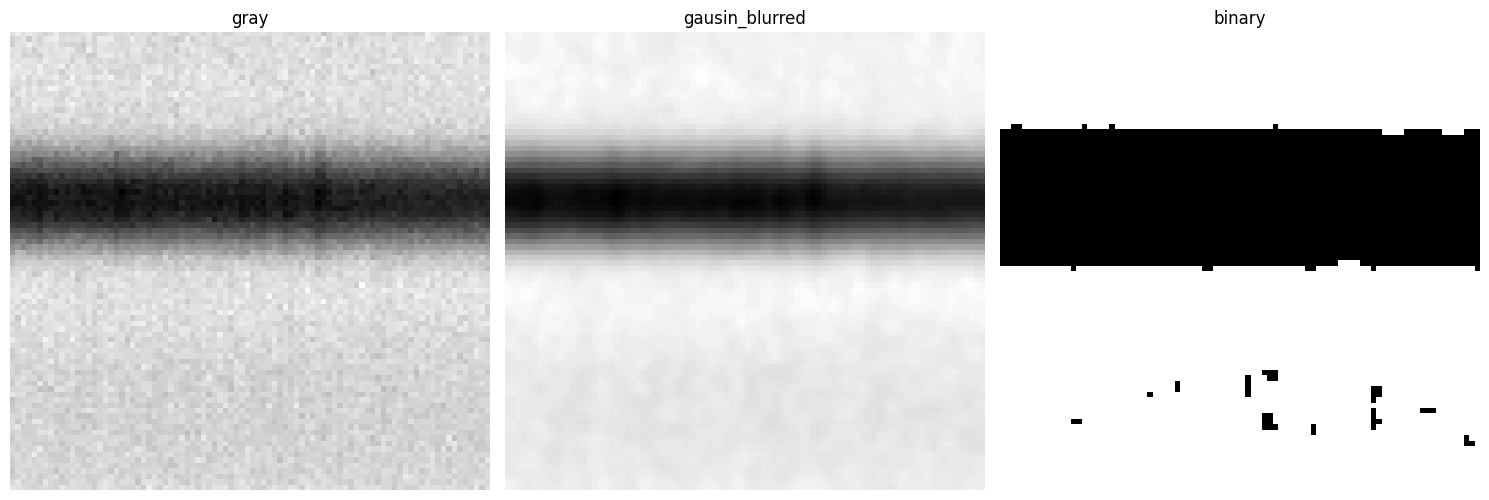

In [46]:
mp.show_pic_simple([gray,blurred,thresh],['gray','gausin_blurred','binary'])

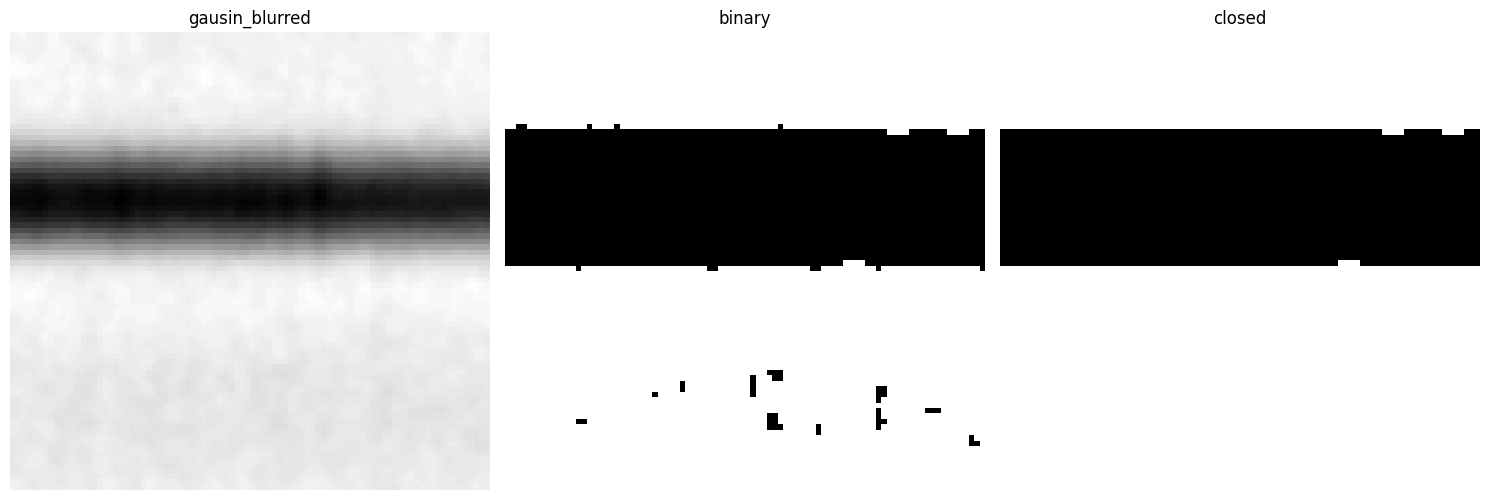

In [47]:
# 4. 形态学操作（闭运算）以填充轮廓中的孔洞
kernel = np.ones((5, 5), np.uint8)
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
mp.show_pic_simple([blurred,thresh,closed],['gausin_blurred','binary','closed'])

In [32]:
closed.shape

(84, 88)

In [48]:
closed_inverted = inverted_image = cv2.bitwise_not(closed)

In [49]:
# 5. 查找轮廓
# cv2.RETR_EXTERNAL 只检测外轮廓
# cv2.CHAIN_APPROX_SIMPLE 压缩轮廓点
contours, _ = cv2.findContours(closed_inverted, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [50]:
min_area = 2
# 6. 过滤并绘制轮廓
for contour in contours:
    # 过滤掉面积过小的轮廓
    if cv2.contourArea(contour) > min_area:
        cv2.drawContours(output_image, [contour], -1, (0, 255, 0), 2)

In [1]:
import cv2
import numpy as np
import myimage_pre as mp

In [11]:
def myfun(image_path,threshold_val, min_area):
    # 1. 读取图片
    image = cv2.imread(image_path)


    # 创建一个用于绘制结果的副本
    output_image = image.copy()

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # 3. 二值化处理
    
    #_, thresh = cv2.threshold(blurred, threshold_val, 255, cv2.THRESH_BINARY)

    # 关键修改：使用 cv2.THRESH_OTSU 自动计算阈值
    #_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # 假设 blurred 是你的高斯模糊图像
    #thresh = cv2.adaptiveThreshold(blurred, 255, 
    #                            cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    #                           cv2.THRESH_BINARY_INV, 
    #                            11, 5)
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    

    # 4. 形态学操作（闭运算）以填充轮廓中的孔洞
    kernel = np.ones((5, 5), np.uint8)
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    closed_inverted = cv2.bitwise_not(closed)

    # 5. 查找轮廓
    # cv2.RETR_EXTERNAL 只检测外轮廓
    # cv2.CHAIN_APPROX_SIMPLE 压缩轮廓点
    contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    


    # 6. 过滤并绘制轮廓
    for contour in contours:
        # 过滤掉面积过小的轮廓
        if cv2.contourArea(contour) > min_area:
            cv2.drawContours(output_image, [contour], -1, (255, 0, 0), 1)
    
    return image, gray, blurred, closed, closed_inverted,output_image



In [17]:
image_path = 't2.BMP'

In [18]:
image, gray, blurred, closed, closed_inverted,output_image = myfun(image_path=image_path, threshold_val = 0,min_area=2)

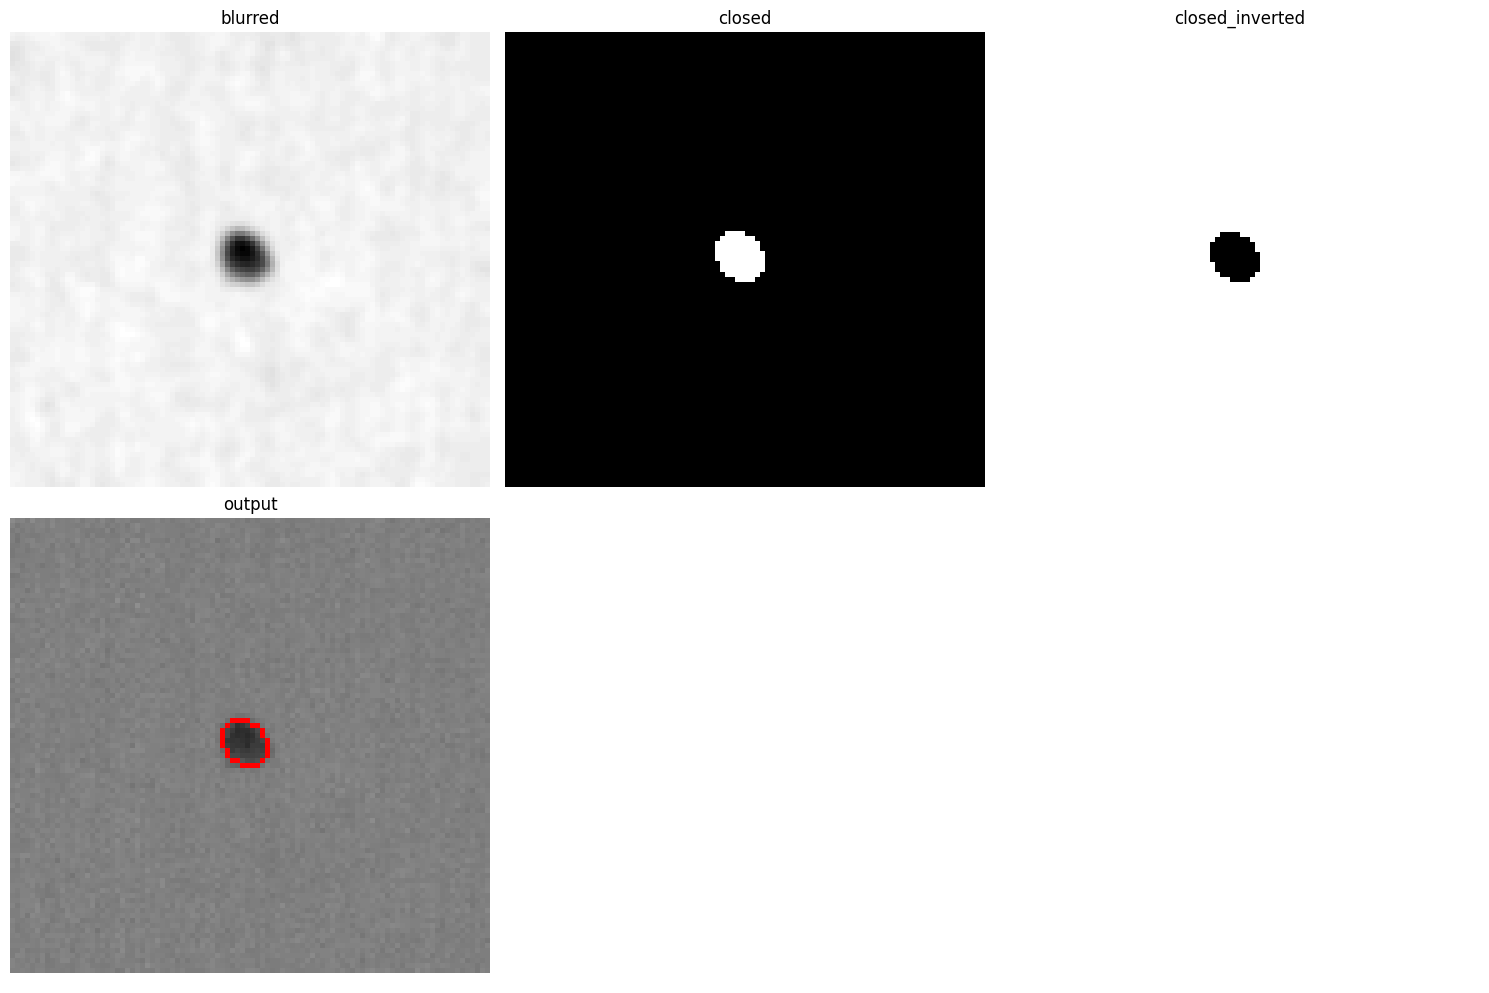

In [19]:
mp.show_pic_simple([blurred,closed,closed_inverted,output_image],['blurred','closed','closed_inverted','output'])
    